# Stock Market Analysis


Tech stocks visualization <br /> 
Risk assessment <br /> 
Monte Carlo- stock price prediction

In [19]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import data, wb
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

from datetime import datetime

# Not applicable for python 3
from __future__ import division

In [20]:
# API for Google and Yahoo finance are not stable
# Use iex instead
# Other sources url: https://pandas-datareader.readthedocs.io/en/latest/

import pandas_datareader.data as web
from datetime import datetime
end=datetime(2018,5,8)
start=datetime(end.year-1,end.month,end.day)
f = web.DataReader('AAPL','iex', start,end)
f.head()

2y


,open,high,low,close,volume
date,,,,,
2017-05-08,146.7090,151.3062,146.7090,150.6270,48752413
2017-05-09,151.4736,152.4679,151.0601,151.5917,39130363
2017-05-10,151.2373,151.5425,149.7410,150.8731,25805692
2017-05-11,150.6952,152.2966,150.5568,152.1779,27255058
2017-05-12,152.9193,154.6195,152.8897,154.3032,32527017


In [21]:
# The tech stocks that are used in the analysis
# AAPL = Apple, GOOG = Google, MSFT = Microsfot, AMZN = Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime(2018,1,1)
start = datetime(end.year - 1,end.month,end.day)


for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'iex',start,end)

2y
2y
2y
2y


In [22]:
# Summary Stats
AAPL.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,148.836282,149.783743,147.883783,148.936850,2.707997e+07
std,15.244058,15.321351,14.973921,15.119471,1.128283e+07
min,113.504400,114.023900,112.485000,113.720000,1.402667e+07
25%,139.685100,140.516950,138.833550,139.606350,2.041327e+07
50%,151.237300,152.158200,149.741000,150.873100,2.436148e+07
75%,158.496600,159.448850,157.299600,158.595850,2.952661e+07
max,174.398900,176.480400,174.149900,175.703600,1.119850e+08


In [23]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 5 columns):
open      251 non-null float64
high      251 non-null float64
low       251 non-null float64
close     251 non-null float64
volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


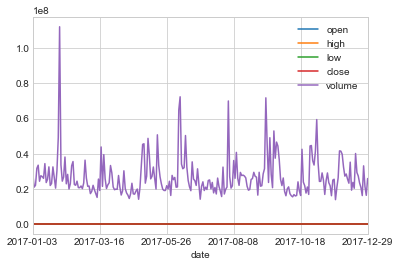

In [24]:
AAPL.plot()

In [25]:
AAPL.iloc[0]

open      1.135044e+02
high      1.140239e+02
low       1.124850e+02
close     1.138474e+02
volume    2.878186e+07
Name: 2017-01-03, dtype: float64

/Users/pettychen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pettychen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pettychen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


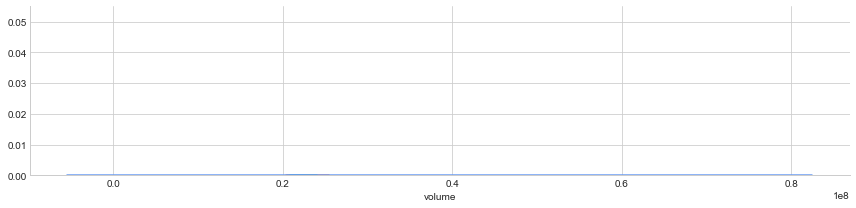

In [26]:
fig = sns.FacetGrid(AAPL, hue="open",aspect=4)
fig.map(sns.kdeplot,'volume',shade= True)

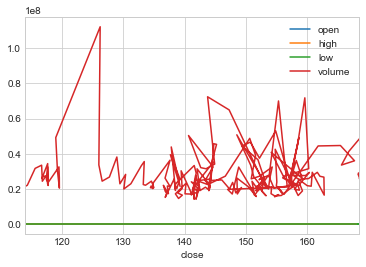

In [27]:
AAPL.plot('close')

In [28]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,113.5044,114.0239,112.4850,113.8474,28781865
2017-01-04,113.5534,114.2003,113.4554,113.7200,21118116
2017-01-05,113.6220,114.5475,113.5142,114.2983,22193587
2017-01-06,114.4649,115.8176,114.1611,115.5725,31751900
2017-01-09,115.6118,117.0624,115.6020,116.6311,33561948


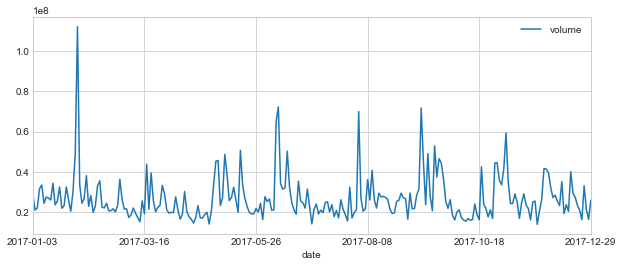

In [29]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['volume'].plot(legend=True,figsize=(10,4))

In [51]:
#  Pandas has a built-in rolling mean calculator

# Plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['close'],ma)

/Users/pettychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
/Users/pettychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
/Users/pettychen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


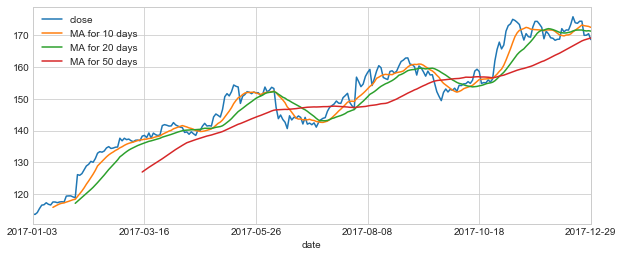

In [52]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

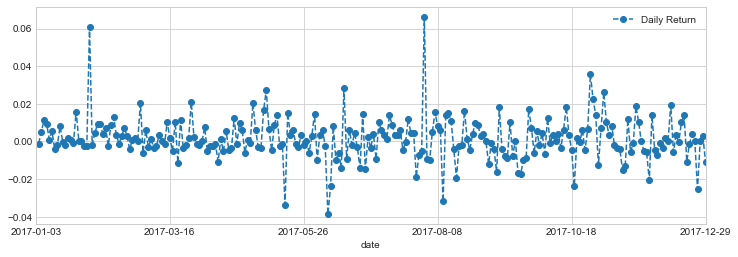

In [32]:
# Use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['close'].pct_change()
# Plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

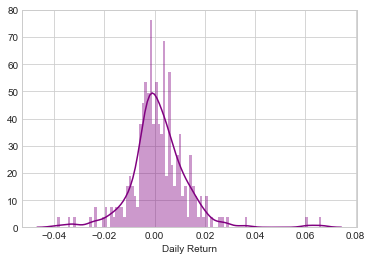

In [33]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Alternative solution
#AAPL['Daily Return'].hist()

In [34]:
apple = web.DataReader("AAPL", "iex", start, end)
microsoft = web.DataReader("MSFT", "iex", start, end)
google = web.DataReader("GOOG", "iex", start, end)
amazon = web.DataReader("AMZN", "iex", start, end)
gilead = web.DataReader("GILD", "iex", start, end)

# Create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
closing_df = pd.DataFrame({"AAPL": apple["close"],
                      "MSFT": microsoft["close"],
                      "GOOG": google["close"],
                           "GILD": gilead["close"],
                          "AMZN": amazon["close"]})

closing_df.tail()

2y
2y
2y
2y
2y


,AAPL,AMZN,GILD,GOOG,MSFT
date,,,,,
2017-12-22,174.2993,1168.36,72.1990,1060.12,85.1102
2017-12-26,169.8773,1176.76,72.1891,1056.74,85.0008
2017-12-27,169.9072,1182.26,72.4671,1049.37,85.3093
2017-12-28,170.3852,1186.10,71.9706,1048.14,85.3193
2017-12-29,168.5428,1169.47,71.1365,1046.40,85.1401


In [35]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

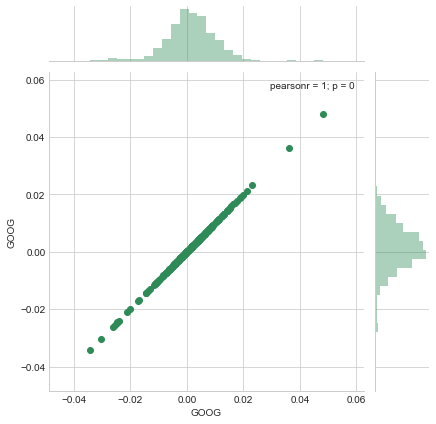

In [36]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

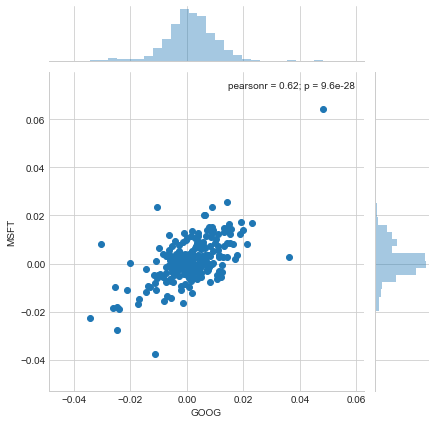

In [37]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

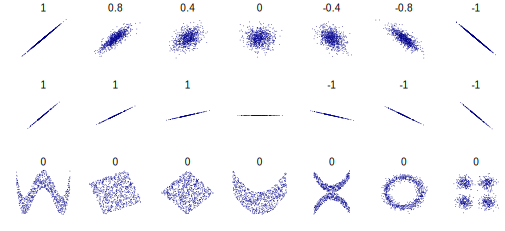

In [38]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

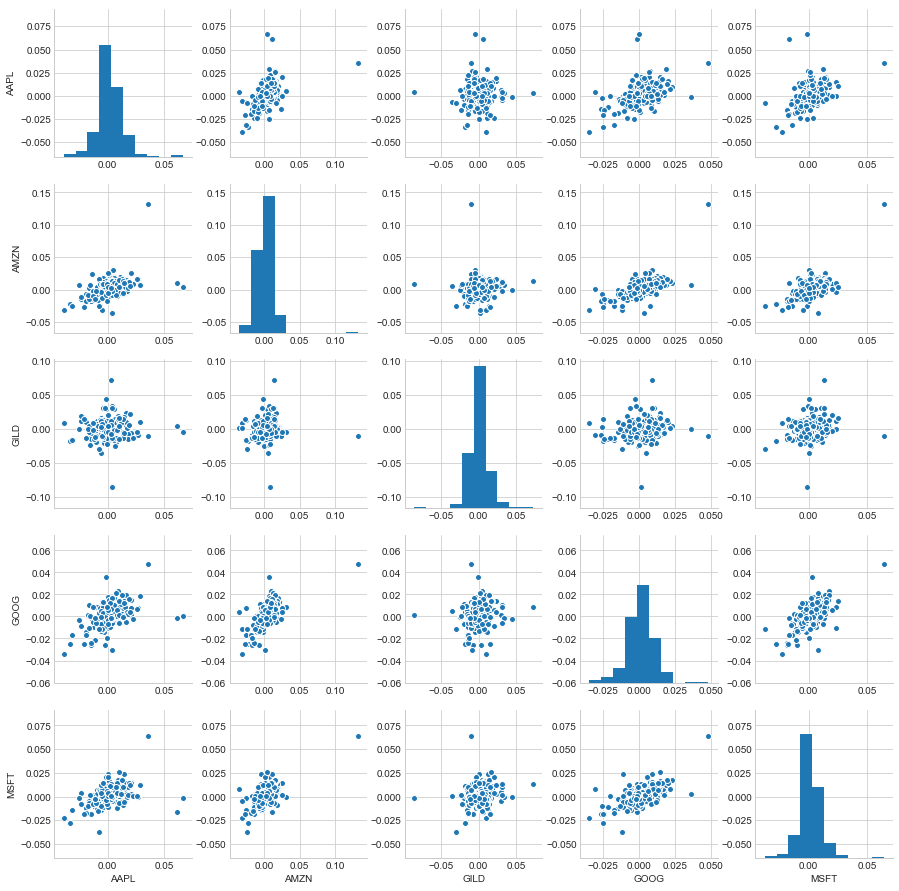

In [39]:
# Call pairplot on the DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

/Users/pettychen/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


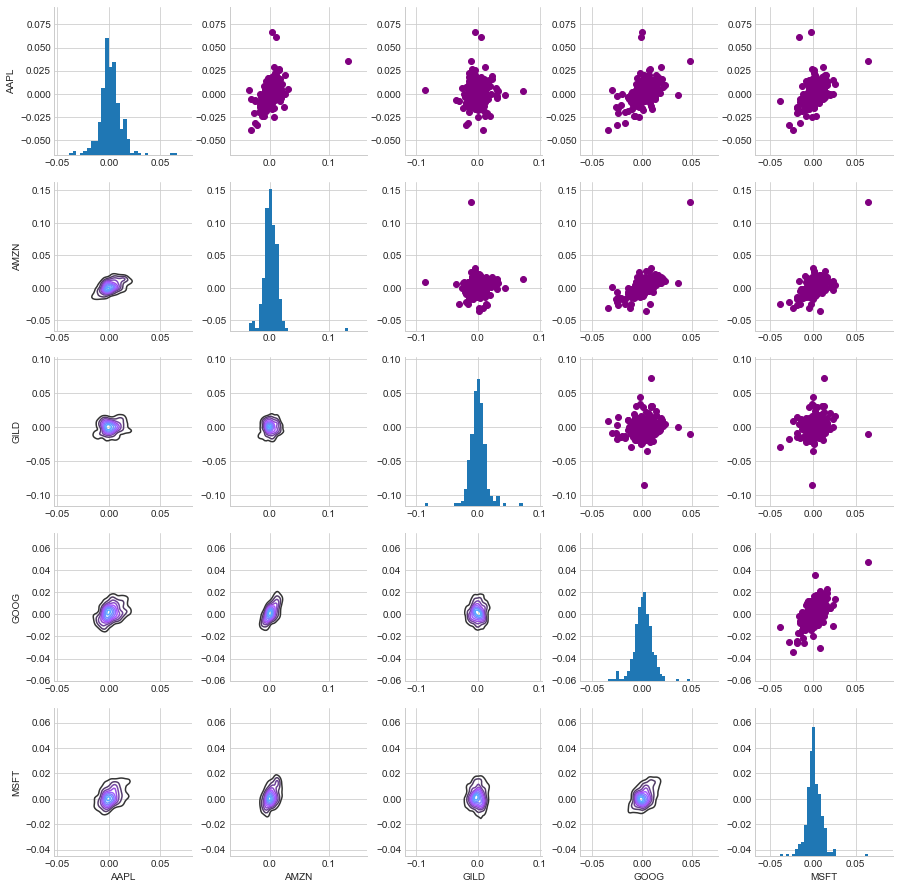

In [40]:
# Set up the figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# Define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

/Users/pettychen/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


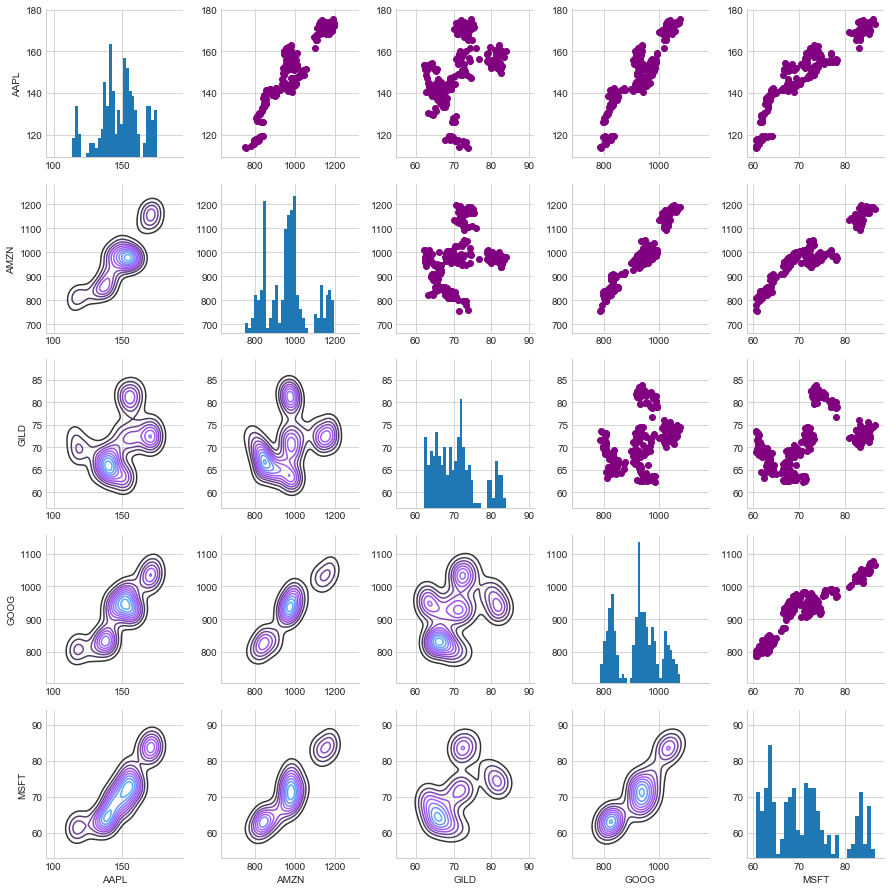

In [41]:
# Set up the figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# Define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

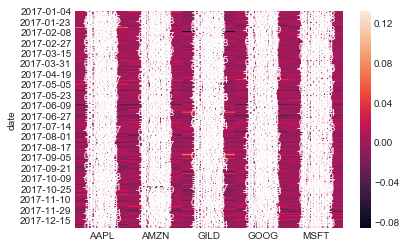

In [42]:
# Plot a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

# Risk Analysis

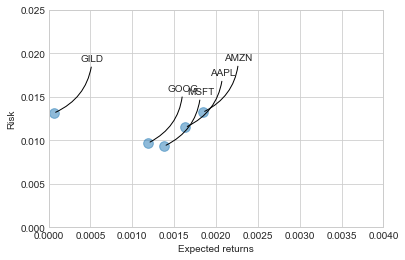

In [43]:
# Define a new DataFrame as a cleaned version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*30

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0,0.025])
plt.xlim([0,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

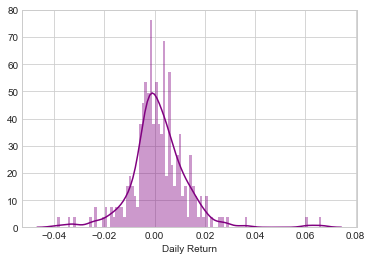

In [44]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [45]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.01494886500228456

# Monte Carlo

In [46]:
# Set up the time horizon
days = 365

# Set the delta
dt = 1/days

# Grab mu (drift) from the expected return data 
mu = rets.mean()['GOOG']

# Grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [47]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

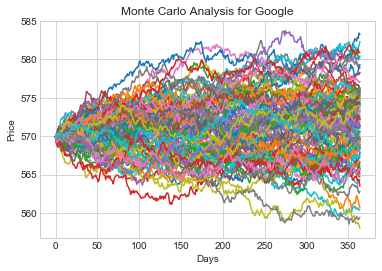

In [48]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [49]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

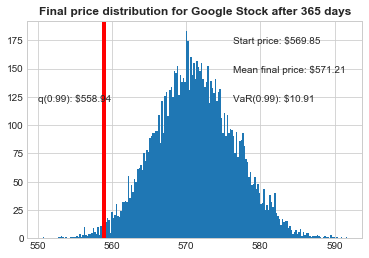

In [50]:
# Define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');